## Why Build a Custom RL Agent?

### 1. Standard Agents Aren’t Designed for Financial Noise

* PPO, A2C, DDPG, etc., are generic.
* They assume dense, stable, well-shaped rewards — which finance rarely offers.
* They don’t adapt their learning based on **regime, predictability, risk**, or **meta-cognition**.

### 2. I already have defined a specific structure

After years of research, at this moment I have well defined and with statistical confirmation that:

* Some stock-months are predictable, others chaotic.
* Regimes change mid-episode.
* Volatility/predictability varies across time.
* The system already generates chaos features, meta-learning labels, episode advantages, and entropy curves with a satisfatory degree of confidence .

Some of these statements are at first glance obvious, but what this project differs is that we can measure everything in real time with pipelines that were backtested across multiple timeframes and with statistical confidence to support the results.

---

## What is different about  this custom agent ?

So, as said before, the  RL agents that are available, are generalized and have given results in stable environments. To beat the stock market we need something different, we need the agent to think as a professional trader. Which brings the question:

### How Professional Traders Live Off the Market
#### 1. **They specialize.**
Most pros don’t trade “everything.” They master specific niches:
* A few stocks
* A strategy (momentum, mean reversion, event-driven)
* A timeframe (intraday, swing, macro)

#### 2. **They adapt.**
* They develop market awareness: recognizing when their strategy stops working and switching modes.
* They update beliefs continuously based on:
1. Regime shifts
2. Personal performance stats
3. Macro signals or volatility cues

#### 3.**They build or use edge-based systems.**
No one lives off randomness. They often define edge as a repeatable, slight statistical advantage over the long run:
* Trade expectancy > 0
* Tight control over risk

#### 4. **They log and learn from every trade.**
Meta-cognition: they review why trades worked/didn’t.

They analyze:
* Trade journals
* Equity curves
* Sharpe/Sortino/max drawdown

#### 5. **They manage risk like pros.**
Risk per trade
* Position sizing
* Max drawdown per week/month
* Live to trade another day


### So how this agent is intended to learn in order to mimic a professional trader?
#### 1. **Self-Aware Policy**

* Tracks and adapts to its own uncertainty (ex: via dropout, entropy, reward volatility).
* Adjusts behavior based on confidence or predictability.

### 2. **Meta-Learning Loop**

* Learns when it is likely to succeed (using the advantage signal).
* Can learn a policy **selector** or **weighting** per environment or regime.

### 3. **Risk-Sensitive Objective**

* Instead of reward-only, it will use a system that rewards **the risk he took**/**advantage gained** :

  $$
  \text{Objective} = \mathbb{E}[R] - \lambda \cdot \text{Drawdown} - \beta \cdot \text{Volatility}
  $$
* Or optimize *Sharpe*, *Sortino*, or *information ratio* directly - lets see.

### 4. **Regime-Aware Adaptation**

* Uses chaos metrics, Hurst, ADF, entropy as **inputs to the policy network** or **conditioning variables**.
* Alternate between different strategies based on detected regime.

### 5. **Custom Exploration Strategy**

* Use entropy of the market or the residuals of a base model to guide exploration.
* More aggressive in predictable environments, more conservative otherwise.

---

## Implementation pipeline:


* **Fork RecurrentPPO** and modifying its **reward signal + loss objective + entropy bonus**.
* **Create as a modular agent** :
  * Can be extendable and have plugins.
  * Fully testable and creates logs so we can analyse everything.
  * Can switch heads based on context.
  * Includes a **self-predictability critic**.
  * Learns when *not* to trade.
  * Learns to manage his internal state like position, assets, etc
  * Walkforward evolution

---

## Summary

| Benefit                   | Why It Matters                                  |
| ------------------------- | ----------------------------------------------- |
| **Better reward shaping** | Tailor to risk-adjusted metrics like Sharpe     |
| **Self-aware learning**   | Know when not to act (avoid overfitting chaos)  |
| **Regime adaptation**     | Trade different in high entropy vs. low entropy |
| **Meta-learnable policy** | Scale to many assets, timeframes                |
| **Interpretability**      | See *why* it took a trade (or not)              |




#  **ChatGPT Reviewed & Enhanced: Custom Trading RL Agent Intro & Pipeline**

## Why Build a Custom RL Agent?

### 1. Standard Agents Aren’t Designed for Financial Noise

* **Standard RL algorithms** (PPO, A2C, DDPG, etc.) are generic, **not specialized for finance**.
* They assume dense, stationary, well-shaped rewards — which financial markets rarely offer.
* They don’t adapt their learning based on **regime, predictability, risk**, or **meta-cognition**.
* **In finance:**

  * **Reward signals are sparse, delayed, and noisy**.
  * **Stationarity is an illusion**—regimes shift, and market dynamics mutate constantly.

### 2. This Project Leverages Proven Structure & Meta-Labeling

After years of research, our pipeline now:

* **Confirms** that some stock-months are predictable, others chaotic.
* **Detects regime changes mid-episode** and quantifies volatility/predictability dynamically.
* **Extracts real-time meta-features:** chaos metrics, meta-learning labels, episode advantages, entropy curves—**all statistically validated** and backtested across multiple timeframes.

> **Note:** What sets this apart isn’t just recognizing these truths, but **quantifying them in real time**, **filtering episodes**, and validating **predictability** with confidence intervals and out-of-sample testing.

---

## What Makes This Custom Agent Different?

### Generalized RL ≠ Trading Intelligence

Generic RL agents can do well in **games** or **static environments**. But to beat the market, we want an agent that **thinks and adapts like a professional trader**—actively managing risk, adjusting to regime, and learning from its own history.

---

### How Professional Traders Survive and Thrive

#### 1. **Specialization**

* Focus on a niche: specific stocks, strategies, or timeframes.
* Build expertise rather than “trade everything.”

#### 2. **Adaptive Market Awareness**

* Detect when strategies stop working and shift approach.
* Continuously update beliefs using:

  * **Regime detection**
  * **Personal performance stats**
  * **Macro signals and volatility cues**

#### 3. **Edge-Driven, Not Random**

* Edge = Repeatable, statistically significant advantage.
* Trade expectancy > 0; always **manage risk**.

#### 4. **Meta-Cognition & Continuous Learning**

* Keep a trade journal; review every trade for *why* it worked or didn’t.
* Analyze equity curves, Sharpe/Sortino ratios, max drawdown, risk metrics.

#### 5. **Pro-Level Risk Management**

* Strict limits: position sizing, daily/weekly/monthly drawdown caps.
* “Live to trade another day”—survival over heroics.

---

### So How Should the Agent Learn Like a Pro?

#### 1. **Self-Aware Policy**

* Tracks & adapts to its own uncertainty (e.g., via dropout, entropy, reward volatility).
* Adjusts behavior dynamically based on **confidence or environment predictability**.

#### 2. **Meta-Learning Loop**

* Learns when it’s likely to succeed (via episode-level *advantage* signals).
* Learns a **policy selector** or **weighting**—tuning strategies to regime or meta-state.

#### 3. **Risk-Sensitive Objective**

* Moves beyond pure reward: optimizes for **risk-adjusted return**.

  $$
  \text{Objective} = \mathbb{E}[R] - \lambda \cdot \text{Drawdown} - \beta \cdot \text{Volatility}
  $$
* Optionally, **directly optimize Sharpe, Sortino, or Information Ratio**.
* Risk management is *in the loss function*, not just post-processing.

#### 4. **Regime-Aware Adaptation**

* Uses chaos, Hurst, ADF, entropy as **inputs to the policy network** and/or **conditioning variables**.
* Switches strategies, policy heads, or action distributions *based on detected regime*.

#### 5. **Custom Exploration Strategy**

* **Guides exploration** with market entropy or base-model residuals.
* Explores aggressively in predictable regimes; plays defense in chaos.

---

## Implementation Pipeline

1. **Fork RecurrentPPO** (or similar baseline), modifying:

   * **Reward signal:** incorporate risk/advantage metrics.
   * **Loss objective:** include risk, Sharpe, or other edge-based terms.
   * **Entropy bonus:** adapt to meta-feature signals.

2. **Build as a modular, extensible agent:**

   * Support plugins (e.g., regime classifier, meta-feature critic).
   * Extensive logging & analysis (to debug and learn from each run).
   * Switch policy heads (or strategies) contextually.
   * **Self-predictability critic:** learns when *not* to trade.
   * Manages internal state: positions, assets, and agent context.

3. **Meta-Learning Pipeline:**

   * Continually update meta-labeler based on live rollouts.
   * Use meta-features to gate episode selection, policy choice, and learning rate.

4. **Rigorous Testing & Logging:**

   * Track *not just PnL*, but Sharpe, drawdown, regime-specific performance.
   * Analyze agent’s actions by regime/meta-bin.

---

## Summary Table

| Benefit                   | Why It Matters                                    |
| ------------------------- | ------------------------------------------------- |
| **Better reward shaping** | Tailor to risk-adjusted metrics (Sharpe, Sortino) |
| **Self-aware learning**   | Knows when to act, and when to step back          |
| **Regime adaptation**     | Adjusts to high/low entropy, volatility, or chaos |
| **Meta-learnable policy** | Can generalize across assets/timeframes/regimes   |
| **Interpretability**      | Shows *why* it took a trade (or not)              |

---

## **Extra Suggestions / Points for Improvement**

* **Experiment Tracking:**

  * Systematically log configuration, seed, meta-features, and performance per run—enables reproducibility and meta-analysis.
* **Walkforward & Curriculum:**

  * Employ walkforward validation (roll by roll) to avoid lookahead bias.
  * Curriculum: Train on easier/predictable regimes first, then introduce chaos.
* **Contrastive Predictability:**

  * Use pairwise “A > B” predictability ranking (as we’re exploring) to further filter/schedule episodes for training.
* **Universal Agent Head (optional):**

  * A small “universal” head trained across all regimes, acting as a regularizer.
* **Visualization:**

  * Build diagnostics: regime maps, meta-feature heatmaps, policy confidence, and “action attribution” visualizations.

---


In [1]:
import jupyter

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.utils.system import boot
from src.defaults import TOP2_STOCK_BY_SECTOR, RANDOM_SEEDS
from src.data.feature_pipeline import load_base_dataframe

DEVICE = boot()
OHLCV_DF = load_base_dataframe()

C:\Users\Francisco Sá\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
from hurst import compute_Hc
from pyts.image import RecurrencePlot
import datetime

# PROJECT SETUP ==================================
TICKERS         = ["TSLA"] 
#TICKERS = OHLCV_DF['symbol'].unique()
#TICKERS = TOP2_STOCK_BY_SECTOR 

CHAOS_THRESHOLD = 0.45
WINDOW_SIZE     = 120
ENTROPY_BINS    = 10
N_WEEK_DAYS     = 5
STEP_SIZE       = 20
MAX_LEN         = 64
LOOKBACK_BUFFER = 40
ROLLING_WINDOW  = 5
START_DATE      = "2023-01-01",
END_DATE        = "2025-05-01"#pd.Timestamp.today().replace(day=1)
TRAIN_MONTHS    = 2
TEST_MONTHS     = 1
MIN_WINDOW_DAYS = 20
NUM_EPOCHS      = 1
SEEDS = RANDOM_SEEDS[:5]

""" 
DEVELOPER NOTES:
@todo : onehot encode day_of_week so the Model wont use the data as a sized sequence 
"""
BASIC_FEATURES=[
    "close"	,          # Core price for reward and trend awareness
    "volume",          # Volume for activity level
    "candle_body",     # Price strength (close-open)
    "upper_shadow",    # Wick size = volatility / exhaustion
    "lower_shadow",    # Same as above
    "order_flow",      # Flow = pressure indicator (buy/sell imbalance)
    "price_change",    # Price momentum short term
    "volatility",      # Recent price dispersion
    "momentum",        # Rolling price trend
    "vix_norm",        # Implied market risk normalized
    "market_return_1d",# Market regime alignment
    "day_of_week"      # heard it's important                
]

# That’s 12 columns, enough to:
# * See price movement
# * Detect regime shifts
# * Respond to risk

# Second Round:
# * overnight_price_change → if overnight gaps matter to your strategy
# * trade_count_change → intraday activity shifts
# * sp500_norm → macro regime normalization

DEFAULT_INTERNAL_FEATURES = [
    "position",
    "holding_period",
    "cumulative_reward",
    "pct_time",
    "drawdown",
    "unrealized_pnl",
    "entry_price",
    "time_in_position",
    "prev_action"
]



# Data preparation

In [4]:
# DATA PREPROCESSING ===============================
import numpy as np
import pandas as pd
import ace_tools_open as tools

from typing import List, Tuple
from datetime import timedelta
from scipy.stats import entropy, kurtosis
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from dateutil.relativedelta import relativedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler, OneHotEncoder



# Step 1 - walkforward
def generate_walkforward_windows(
    df: pd.DataFrame,
    symbol_col: str = "symbol",
    date_col: str = "date",
    start_date: str = "2023-01-01",
    end_date: str = "2025-05-01",
    train_months: int = 2,
    test_months: int = 1,
    min_days_per_window: int = 20,
    max_feature_rolling_window:int=5,
    lookback_buffer_days: int = 30

) -> List[dict]:
    """
    Splits a dataframe into walkforward windows (train and test) per symbol.

    Parameters:
        df: Full OHLCV dataframe with at least [date_col, symbol_col]
        symbol_col: Name of the symbol column
        date_col: Name of the date column
        start_date: Start date of walkforward (string or datetime)
        end_date: End date of walkforward (string or datetime)
        train_months: Number of months in training window
        test_months: Number of months in test window
        min_days_per_window: Minimum number of rows to consider a window valid

    Returns:
        List of window dicts with keys:
            - symbol
            - train_start
            - train_end
            - test_start
            - test_end
            - train_df
            - test_df
    """
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    start_date = pd.to_datetime(start_date)#[0]
    end_date = pd.to_datetime(end_date)#[0]

    windows = []
    symbols = df[symbol_col].unique()

    for symbol in symbols:
        symbol_df = df[df[symbol_col] == symbol].sort_values(date_col).reset_index()
        current_start = start_date
        current_start = current_start[0]
        while True:
            # Train window with padded lookback
            
            episode_start = current_start
          
            buffer_size = lookback_buffer_days + max_feature_rolling_window
       
            episode_idx = symbol_df[symbol_df[date_col] >= current_start].index[0]
            #print(current_start,episode_idx)
            train_start_idx = episode_idx - buffer_size

            if train_start_idx < 0:
                current_start = current_start + relativedelta(months=1)  # skip this episode
                continue
            
 
            train_start = symbol_df.iloc[train_start_idx][date_col]
            train_end = episode_start + relativedelta(months=train_months)
            
            
            test_start_idx = symbol_df[symbol_df[date_col] >= train_end].index[0] - buffer_size
            
            if test_start_idx < 0:
                break

            test_start = symbol_df.iloc[test_start_idx][date_col]
            test_end = train_end + relativedelta(months=test_months)
            
            if test_end > end_date:
                break

            train_df = symbol_df[(symbol_df[date_col] >= train_start) & (symbol_df[date_col] < train_end)]
            test_df = symbol_df[(symbol_df[date_col] >= test_start) & (symbol_df[date_col] < test_end)]
            #print(len(train_df),len(test_df))
            #print(len(test_df))
            if len(train_df) >= min_days_per_window and len(test_df) >= min_days_per_window:
                windows.append({
                    "symbol": symbol,
                    "train_start": train_start,
                    "train_end": train_end,
                    "test_start": test_start,
                    "test_end": test_end,
                    "true_train_start": episode_start,
                    "true_test_start": train_end,
                    "train_df": train_df,
                    "test_df": test_df
                })

            current_start = test_end

    def visualize():
        display_df = pd.DataFrame([{
            "symbol": w["symbol"],
            "train_start": w["train_start"],
            "true_train_start": w["true_train_start"],
            "train_end": w["train_end"],
            "test_start": w["test_start"],
            "test_end": w["test_end"],
            "true_train_start": episode_start,
            "true_test_start": train_end,
            "train_days": len(w["train_df"]),
            "test_days": len(w["test_df"])
        } for w in windows])
       
        tools.display_dataframe_to_user(name="Walkforward Windows (Buffered)", dataframe=display_df)

    return windows, visualize

def process_episode_features(
    windows,
    feature_cols,
    categorical_cols=["day_of_week"],
    target_col="close",
    chaos_bins=10,
    rf_window=30,
    rolling_window=5,
    n_week_days=5,
    lookback_buffer_days: int = 30,
    regime_func=None
):
    episodes_data = []

    # Fit OneHotEncoder in advance
    onehot = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
    onehot.fit(np.array(range(n_week_days)).reshape(-1, 1))

    for w in windows:
        train_df = w["train_df"].copy().reset_index(drop=True)
        test_df = w["test_df"].copy().reset_index(drop=True)
            
        # === Generate rolling features ONLY if requested ===
        if "volatility" in feature_cols:
            train_df["volatility"] = train_df["close"].rolling(rolling_window).std()
            test_df["volatility"] = test_df["close"].rolling(rolling_window).std()
        if "momentum" in feature_cols:
            train_df["momentum"] = train_df["close"].diff(rolling_window)
            test_df["momentum"] = test_df["close"].diff(rolling_window)

        # === Ensure we only use requested feature_cols ===
        numeric_features = [c for c in feature_cols if c not in categorical_cols]
        encoded_cat_features = [f"{col}_{i}" for col in categorical_cols for i in range(onehot.categories_[0].size)]
        feature_names = numeric_features + encoded_cat_features

        # Drop NaNs in selected features
        train_df = train_df.dropna(subset=numeric_features, axis=0)
        test_df = test_df.dropna(subset=numeric_features, axis=0)

        # === Feature transformer ===
        def process_df(df, fit_scaler=False, scaler=None):
            X = df.copy()
            for col in categorical_cols:
                encoded = onehot.transform(X[[col]].values)
                for i in range(encoded.shape[1]):
                    X[f"{col}_{i}"] = encoded[:, i]
            X = X.drop(columns=categorical_cols, errors="ignore")
            if fit_scaler:
                scaler = RobustScaler()
                X[numeric_features] = scaler.fit_transform(X[numeric_features])
            else:
                X[numeric_features] = scaler.transform(X[numeric_features])
            return X[feature_names].values, scaler

        # === Meta Features ===
        returns = train_df["close"].pct_change().dropna()
        price = train_df["close"].values
        meta = {
            "symbol": w["symbol"],
            "train_start": w["train_start"],
            "train_end": w["train_end"],
            "test_start": w["test_start"],
            "test_end": w["test_end"],
            "std": returns.std(),
            "kurt": kurtosis(returns) if len(returns) > 10 else np.nan,
            "entropy": entropy(np.histogram(returns, bins=chaos_bins)[0] + 1),
            "hurst": np.polyfit(
                np.log(range(2, 20)),
                np.log([np.std(price[lag:] - price[:-lag]) for lag in range(2, 20)]),
                1,
            )[0] if len(price) > 20 else np.nan,
            "adf_pval": adfuller(returns)[1] if len(returns) > 10 else np.nan,
        }

        # Predictability metrics
        def predictability_features(df, cols):
            if len(df) < rf_window:
                return {'rf_r2': np.nan, 'rf_resid_std': np.nan, 'resid_autocorr': np.nan}
            X = df[cols].copy()
            y = df[target_col]
            rf = RandomForestRegressor(n_estimators=30, random_state=42)
            rf.fit(X, y)
            resid = y - rf.predict(X)
            return {
                'rf_r2': rf.score(X, y),
                'rf_resid_std': np.std(resid),
                'resid_autocorr': acf(resid, nlags=1)[1] if len(resid) > 1 else np.nan
            }

        meta.update(predictability_features(train_df, numeric_features))
        meta['raw_close'] = train_df['close'].values
        meta['raw_close_test'] = test_df['close'].values
        meta["regime"] = regime_func(meta) if regime_func else None

        # Transform features
        train_arr, scaler = process_df(train_df, fit_scaler=True)
        test_arr, _ = process_df(test_df, fit_scaler=False, scaler=scaler)

        # Append episode
        episodes_data.append({
            "symbol": w["symbol"],
            "train_start": w["train_start"],
            "train_end": w["train_end"],
            "test_start": w["test_start"],
            "test_end": w["test_end"],
            "train_features": train_arr,
            "test_features": test_arr,
            "meta": meta,
            'train_episode_length': len(train_arr)-lookback_buffer_days-1,
            'test_episode_length': len(test_arr)-lookback_buffer_days-1,
        })

    return episodes_data, feature_names


In [5]:
# STEP 1 - GET DATA =======================

df = OHLCV_DF[OHLCV_DF['symbol'].isin(TICKERS)].copy()

walkforward_windows, visualize_walkforward_windows = generate_walkforward_windows(
    df ,
    

    start_date                 = START_DATE,
    end_date                   = END_DATE,
    train_months               = TRAIN_MONTHS,
    test_months                = TEST_MONTHS,
    
    max_feature_rolling_window = ROLLING_WINDOW,
    lookback_buffer_days       = LOOKBACK_BUFFER,    
    #min_days_per_window: int = 20,
)

feature_df,feature_names  = process_episode_features(
    walkforward_windows,
    feature_cols          = BASIC_FEATURES,
    lookback_buffer_days  = LOOKBACK_BUFFER,
)

visualize_walkforward_windows()
#feature_names



Walkforward Windows (Buffered)


Loading ITables v2.4.0 from the internet... (need help?)


# Custom trading environment

In [14]:
import numpy as np
import gymnasium as gym
from gymnasium import spaces

DEFAULT_INTERNAL_FEATURES = [
    "position",
    "holding_period",
    "cumulative_reward",
    "pct_time",
    "drawdown",
    "unrealized_pnl",
    "entry_price",
    "time_in_position",
    "prev_action"
]

class MetaFeatureTradingEnv(gym.Env):
    """
    RL Trading Environment with agent-ready feature arrays, meta-feature support,
    risk-aware reward shaping, and regime/meta gating.
    Designed for integration with advanced feature/episode pipelines.
    """
    metadata = {"render_modes": ["human"]}

    def __init__(self,
                 window_length=40,
                 episode_length=100,
                 action_space_dim=3,
                 feature_dim=None,
                 internal_features=None,
                 return_sequences=True,
                 reward_fn=None,
                 mask_unlearnable=True,
                 episodes_data=None,
                 redundant_action_penalty=0.01,
                 mode="train"
                ):
        super().__init__()
        self.mode=mode
        self.window_length = window_length
        self.episode_length = episode_length
        self.return_sequences = return_sequences
        self.internal_features = internal_features or DEFAULT_INTERNAL_FEATURES
        self.reward_fn = reward_fn or self.default_reward_fn
        self.mask_unlearnable = mask_unlearnable
        self.redundant_action_penalty = redundant_action_penalty

        self.episodes_data = episodes_data or []
        # Dynamically detect features_dim from episodes_data
        self._infer_feature_dim()

        self.observation_space = spaces.Box(
            low=-np.inf,
            high=np.inf,
            shape=(self.window_length, self.features_dim),
            dtype=np.float32
        )
        self.action_space = spaces.Discrete(action_space_dim)

        # Internal state
        self._reset_internal_state()

    def _infer_feature_dim(self):
        # features_dim = base features + internal features
        if self.episodes_data and "train_features" in self.episodes_data[0]:
            base_dim = self.episodes_data[0]["train_features"].shape[1]
            self.features_dim = base_dim + len(self.internal_features)
        else:
            self.features_dim = 16  # fallback default

    def _reset_internal_state(self):
        self.features_array = None
        self.meta = None
        self.current_step = 0
        self.position = 0
        self.holding_period = 0
        self.cumulative_reward = 0
        self.wealth = 1.0
        self.peak_wealth = 1.0
        self.drawdown = 0
        self.unrealized_pnl = 0
        self.entry_price = 0.0
        self.time_in_position = 0
        self.equity_curve = []
        self.market_curve = []
        self.trade_log = []
        self.prev_action = 0

    def reset(self, features_array=None, meta=None, seed=None, options=None):
        if seed is not None:
            np.random.seed(seed)

        # --- Episode selection (RL or curriculum) ---
        if features_array is None:
            if not self.episodes_data or len(self.episodes_data) == 0:
                raise RuntimeError("No episodes_data available to sample from!")
            episode = np.random.choice(self.episodes_data)
            features_array = episode[self.mode+"_features"]
            meta = episode.get("meta", {})
            if self.mode =="train":
                self.raw_close = meta.get('raw_close', np.ones(self.episode_length + self.window_length + 2))
            else:
                self.raw_close = meta.get('raw_close_test', np.ones(self.episode_length + self.window_length + 2))
            self.episode_length = episode.get(self.mode+'_episode_length', features_array.shape[0] - self.window_length)
        else:
            self.episode_length = features_array.shape[0] - self.window_length

        # --- Dynamic features_dim/obs space update if needed ---
        self._infer_feature_dim()
        if features_array.shape[1] + len(self.internal_features) != self.features_dim:
            self.features_dim = features_array.shape[1] + len(self.internal_features)
            self.observation_space = spaces.Box(
                low=-np.inf,
                high=np.inf,
                shape=(self.window_length, self.features_dim),
                dtype=np.float32
            )

        # --- Reset all state ---
        self.prev_action = 0
        self._reset_internal_state()
        self.features_array = features_array
        self.meta = meta or {}
        self.current_step = 0
        self.equity_curve = [self.wealth]
        #self.raw_close = 
        self.market_curve = [1.0]
        for i in range(1, self.episode_length + 1):
            ret = self.raw_close[self.window_length + i] / self.raw_close[self.window_length + i - 1]
            self.market_curve.append(self.market_curve[-1] * ret)

        # Early skip for "unlearnable" episodes (predictability/gating)
        if self.mask_unlearnable and self.meta.get("rf_r2", 1.0) < 0.02:
            return None, {"skip": True, "reason": "low predictability"}

        obs = self._get_obs()
        #print('RESET SHAPE:', obs.shape)
        return obs,{}

    def _get_internal_state(self):
        return np.array([
            self.position,
            self.holding_period,
            self.cumulative_reward,
            self.current_step / max(1, self.episode_length),
            self.drawdown,
            self.unrealized_pnl,
            self.entry_price if self.entry_price is not None else 0.0,
            self.time_in_position,
            self.prev_action
        ], dtype=np.float32)

    def _get_obs(self):
        idx_start = self.current_step
        idx_end = idx_start + self.window_length
        obs_window = []
        for i in range(idx_start, idx_end):
            market_feat = self.features_array[i, :]
            internal_state = self._get_internal_state()
            obs_row = np.concatenate([market_feat, internal_state])
            obs_window.append(obs_row)
        obs_window = np.stack(obs_window)
        if self.return_sequences:
            return obs_window
        else:
            return obs_window.flatten()

    def step(self, action):
        prev_position = self.position
        prev_entry_price = self.entry_price if self.entry_price is not None else 0.0

        # Get the current (for closing), and next price (for new entry, wealth update)
        current_price = self.raw_close[self.current_step + self.window_length]
        next_price = self.raw_close[self.current_step + self.window_length + 1] if (self.current_step + self.window_length + 1) < len(self.raw_close) else current_price
       
        # Penalize redundant actions
        base_reward = 0
        if (self.position == 1 and action == 1) or (self.position == -1 and action == 2):
            base_reward -= self.redundant_action_penalty
            
        # 1. Compute realized PnL if closing a position
        realized_pnl = 0.0
        trade_closed = False
        if prev_position != 0 and (
            (action == 1 and prev_position == -1) or
            (action == 2 and prev_position == 1) or
            (action == 0)
        ):
            realized_pnl = (current_price - prev_entry_price) * prev_position / prev_entry_price
            self.cumulative_reward += realized_pnl
            trade_closed = True
            self.trade_log.append({
                "entry_price": prev_entry_price,
                "exit_price": current_price,
                "position": prev_position,
                "holding_period": self.holding_period,
                "realized_pnl": realized_pnl,
                "step": self.current_step,
                "forced_exit": False
            })

        # 2. Handle new position or hold
        if action == 1:  # Buy
            if prev_position != 1:
                self.position = 1
                self.entry_price = current_price
                self.holding_period = 1
            else:
                self.holding_period += 1
        elif action == 2:  # Sell
            if prev_position != -1:
                self.position = -1
                self.entry_price = current_price
                self.holding_period = 1
            else:
                self.holding_period += 1
        else:  # Hold
            if self.position != 0:
                self.holding_period += 1
            else:
                self.holding_period = 0

        # 3. Update unrealized PnL
        if self.position != 0:
            self.unrealized_pnl = (current_price - self.entry_price) * self.position / self.entry_price
        else:
            self.unrealized_pnl = 0.0

        # 4. Wealth update (mark-to-market on next price)
        step_return = self.position * ((next_price - current_price) / current_price)
        self.wealth *= (1 + step_return)
        self.peak_wealth = max(self.peak_wealth, self.wealth)
        self.drawdown = 1 - self.wealth / self.peak_wealth

        self.current_step += 1
        obs = self._get_obs()
        self.prev_action = action
        info = {
            "regime": self.meta.get("regime", None),
            "drawdown": self.drawdown,
            "agent_wealth": self.wealth,
            "market_benchmark": self.market_curve[self.current_step] if hasattr(self, "market_curve") else None,
            "realized_pnl": realized_pnl,
            "trade_closed": trade_closed,
            "mode":self.mode
        }

        done = self.current_step >= self.episode_length - 1
        # --- Force close position at episode end
        if done and self.position != 0:
            final_price = self.raw_close[self.current_step + self.window_length]
            realized_pnl = (final_price - self.entry_price) * self.position / self.entry_price
            self.cumulative_reward += realized_pnl
            trade_closed = True
            self.trade_log.append({
                "entry_price": self.entry_price,
                "exit_price": final_price,
                "position": self.position,
                "holding_period": self.holding_period,
                "realized_pnl": realized_pnl,
                "step": self.current_step,
                "forced_exit": True
            })
            self.position = 0
            self.entry_price = 0.0
            self.holding_period = 0
            self.unrealized_pnl = 0.0
            info["realized_pnl"] = realized_pnl
            info["trade_closed"] = trade_closed
            info["forced_exit"] = True

        #print('STEP SHAPE:', obs.shape)
        return obs, self.unrealized_pnl + realized_pnl, done, False, info

    def default_reward_fn_v1(self, position, price_change, wealth, drawdown, meta, env):
        lam = meta.get("volatility_penalty", 0.01)
        beta = meta.get("drawdown_penalty", 0.1)
        volatility = meta.get("volatility", 0.01)
        reward = position * price_change
        reward -= lam * volatility
        reward -= beta * drawdown
        return reward
    
    def default_reward_fn(self, position, price_change, wealth, drawdown, meta, env):
        """
        Custom risk-aware reward:
        - position: current position (1: long, -1: short, 0: flat)
        - price_change: pct change this step (could also use log return)
        - wealth: agent's current wealth
        - drawdown: (1 - wealth/peak_wealth)
        - meta: dict with extra features, e.g. volatility, regime, predictability
        - env: reference to env (can use env.prev_action, env.action_counts, etc.)
        """
        # --- 1. Return component ---
        reward = position * price_change  # core PnL

        # --- 2. Risk Penalties ---
        volatility = meta.get("volatility", 0.01)
        lam = meta.get("volatility_penalty", 0.01)
        reward -= lam * volatility         # penalize high-vol regimes

        beta = meta.get("drawdown_penalty", 0.1)
        reward -= beta * drawdown  * 2       # penalize drawdown

        # --- 3. Transaction cost ---
        cost = meta.get("transaction_cost", 0.0001)
        if getattr(env, "position_changed", False):  # You can set this flag in `step`
            reward -= cost

        # --- 4. Penalize repeated/same action ---
        # Option 1: Slight penalty for not switching
        if hasattr(env, "prev_action") and env.prev_action is not None:
            if env.prev_action == env.last_action:  # or just `action`, pass as arg
                reward -= meta.get("same_action_penalty", 0.005)

        # --- 5. Optional: Penalize inactivity (e.g. always holding flat) ---
        if position == 0:
            reward -= meta.get("inactivity_penalty", 0.001)

        # --- 6. Encourage regime alignment (optional) ---
        # For example, reward being long in bull, short in bear
        regime = meta.get("regime", None)
        if regime == "bull" and position == 1:
            reward += 0.001
        elif regime == "bear" and position == -1:
            reward += 0.001

        # --- 7. Encourage confidence-aligned actions (if confidence available) ---
        confidence = meta.get("confidence", None)
        if confidence is not None and abs(confidence - 0.5) > 0.3:
            reward += 0.001  # Only reward "confident" actions

        # --- 8. Optionally, Sharpe/Sortino as reward proxy ---
        # Could accumulate reward/variance over episode, or per step

        return reward

    def render(self):
        print(f"Step {self.current_step} | Position: {self.position} | CumReward: {self.cumulative_reward:.4f}")


In [15]:
env = MetaFeatureTradingEnv(
    window_length=LOOKBACK_BUFFER,
    episodes_data=feature_df
)
#agent = YourCustomAgentOrSB3Wrapper(env.observation_space, env.action_space, ...)

for epoch in range(NUM_EPOCHS):
    np.random.shuffle(feature_df)  # Optional: curriculum or randomized order
    for episode in feature_df:
        #episode_length = episode['train_episode_length'] -1#len(walkforward_windows[1]['test_df'])-40
        #env.episode_length=episode_length
        obs, info = env.reset()
        if info.get("skip"):
            continue
        done = False
        while not done:
            action = env.action_space.sample() #agent.predict(obs)
            obs, reward, done, truncated, info = env.step(action)
            
            # Log, train, analyze as needed
        print('done')


done
done
done
done
done
done
done
done
done


# Custom RecurrentPPO Agent

In [16]:
import torch
import torch.nn as nn
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

class SimpleTransformerBlock(nn.Module):
    def __init__(self, d_model=64, nhead=4, num_layers=2, dropout=0.1):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
    def forward(self, x):
        # x: [batch, seq_len, d_model]
        return self.transformer_encoder(x)

   
class TransformerFeatureExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=64, nhead=4, num_layers=2):
        super().__init__(observation_space, features_dim)
        self.d_model = features_dim
        input_dim = observation_space.shape[-1]
        # Project input to d_model
        self.input_proj = nn.Linear(input_dim, self.d_model)
        self.transformer = SimpleTransformerBlock(d_model=self.d_model, nhead=nhead, num_layers=num_layers)
        self.pool = nn.AdaptiveAvgPool1d(1)  # For global pooling

    def forward(self, obs):
        # obs: [batch, seq_len, input_dim]
        x = self.input_proj(obs)
        x = self.transformer(x)  # [batch, seq_len, d_model]
        # Pool sequence to single vector (policy/value want flat vector)
        # pool expects [batch, d_model, seq_len]
        x_pooled = self.pool(x.transpose(1,2)).squeeze(-1)  # [batch, d_model]
        return x_pooled


In [17]:
from sb3_contrib import RecurrentPPO

policy_kwargs = dict(
    features_extractor_class=TransformerFeatureExtractor,
    features_extractor_kwargs=dict(features_dim=64, nhead=4, num_layers=2),
    net_arch=dict(pi=[64, 32], vf=[64, 32])  # example: tweak as desired
)

# Instantiate your env as before (MetaFeatureTradingEnv, or your class)
#env = MetaFeatureTradingEnv(...)

model = RecurrentPPO(
    policy="MlpLstmPolicy",      # or "MlpGruPolicy" (sb3-contrib; transformer is in feature extractor)
    env=env,
    verbose=1,
    policy_kwargs=policy_kwargs,
    n_steps=128,
    batch_size=64,
    learning_rate=3e-4,
    device="cuda"  # or "cpu"
)
model.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.7     |
|    ep_rew_mean     | 0.29     |
| time/              |          |
|    fps             | 130      |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 128      |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40.2         |
|    ep_rew_mean          | -0.111       |
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 2            |
|    time_elapsed         | 41           |
|    total_timesteps      | 256          |
| train/                  |              |
|    approx_kl            | 0.0018436098 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    en

# Meta critic module
Learns a meta-model that predicts episode advantage (E[R_agent] - E[R_random]) from the meta-features (rf_r2, chaos, regime, etc).
**When to use**
* Filter episodes
* Curriculum (train on easier episodes first)
* Weighting training samples

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler


class MetaCriticModule:
    """
    @TODO: Add checkpoints to it
    """
    def __init__(
        self,
        df,
        meta_features = ['rf_r2', 'hurst', 'entropy', 'kurt', 'adf_pval'],
        target = 'advantage'
    ):
        self.df = df
        self.meta_features = meta_features
        self.target = target
        self.scaler = RobustScaler()
    
    def train(self):
        
        X = meta_df[meta_features].values
        y = meta_df[target].values
        scaler = self.scaler
        X_scaled = scaler.fit_transform(X)
        meta_critic = RandomForestRegressor(n_estimators=100)
        meta_critic.fit(X_scaled, y)
        self.model= meta_critic
    
    def predict(self,X):
        #X = meta_df[meta_features].values
        #y = meta_df[target].values
        scaler = self.scaler
        model = self.model
        X_scaled = scaler.transform(X)
        return model.predict(X_scaled)



# Policy Architecture with Multiple Heads (including Confidence Head)
Extend  actor-critic net (LSTM/Transformer) to output:
* Action logits (policy head)
* Value estimate (critic head)
* Confidence/uncertainty score (confidence head)
* meta-regime head

In [19]:
from sb3_contrib.common.recurrent.policies import RecurrentActorCriticPolicy
import torch
import torch.nn as nn
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor

class SimpleTransformerBlock(nn.Module):
    def __init__(self, input_dim, nhead=4, d_model=64, num_layers=2, dropout=0.1):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, d_model)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=nhead, batch_first=True, dropout=dropout
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_dim = d_model

    def forward(self, x):
        x = self.input_proj(x)
        x = self.transformer(x)
        return x[:, -1, :]  # use last token

class TransformerFeaturesExtractor(BaseFeaturesExtractor):
    def __init__(self, observation_space, features_dim=64, nhead=4, num_layers=2):
        super().__init__(observation_space, features_dim)
        input_dim = observation_space.shape[-1]
        self.transformer = SimpleTransformerBlock(
            input_dim=input_dim, d_model=features_dim, nhead=nhead, num_layers=num_layers
        )
        self._features_dim = features_dim

    def forward(self, obs):
        return self.transformer(obs)

class CustomTransformerMultiHeadPolicy(RecurrentActorCriticPolicy):
    def __init__(
        self,
        observation_space,
        action_space,
        lr_schedule,
        net_arch=None,
        features_extractor_class=TransformerFeaturesExtractor,
        features_extractor_kwargs=None,
        n_meta_regimes=3,
        **kwargs
    ):
        if features_extractor_kwargs is None:
            features_extractor_kwargs = dict(features_dim=64)
        super().__init__(
            observation_space,
            action_space,
            lr_schedule,
            net_arch=net_arch or [dict(pi=[64], vf=[64])],
            features_extractor_class=features_extractor_class,
            features_extractor_kwargs=features_extractor_kwargs,
            **kwargs
        )
        feat_dim = self.features_extractor._features_dim
        self.confidence_head = nn.Linear(feat_dim, 1)
        self.meta_regime_head = nn.Linear(feat_dim, n_meta_regimes)

    def forward(self, obs, lstm_states, episode_starts, deterministic=False):
        features = self.extract_features(obs)
        distribution = self._get_action_dist_from_latent(features)
        value = self.value_net(features)
        actions = distribution.get_actions(deterministic=deterministic)
        log_prob = distribution.log_prob(actions)
        confidence = torch.sigmoid(self.confidence_head(features)).squeeze(-1)
        meta_regime_logits = self.meta_regime_head(features)
        # For SB3, must return (actions, values, log_prob, lstm_states)
        # The extra heads are for auxiliary loss/logging
        self._last_confidence = confidence
        self._last_meta_regime_logits = meta_regime_logits
        return actions, value, log_prob, lstm_states

    # For logging/evaluation:
    def predict_confidence(self, obs):
        with torch.no_grad():
            features = self.extract_features(obs)
            return torch.sigmoid(self.confidence_head(features)).squeeze(-1)

    def predict_meta_regime(self, obs):
        with torch.no_grad():
            features = self.extract_features(obs)
            logits = self.meta_regime_head(features)
            return logits.argmax(dim=-1)
    
    # Custom auxiliary loss for confidence/meta-regime (optional):
    def auxiliary_loss(self, batch):
        # Example batch: dict with 'obs', 'advantage', 'regime_label'
        features = self.extract_features(batch['obs'])
        conf = torch.sigmoid(self.confidence_head(features)).squeeze(-1)
        regime_logits = self.meta_regime_head(features)
        loss = 0.0
        # Confidence MSE to abs(advantage)
        if 'advantage' in batch:
            conf_target = batch['advantage'].abs()
            loss += ((conf - conf_target) ** 2).mean()
        # Regime prediction cross-entropy
        if 'regime_label' in batch:
            loss += nn.CrossEntropyLoss()(regime_logits, batch['regime_label'])
        return loss

   


In [20]:
import numpy as np
from torch.utils.tensorboard import SummaryWriter

class MetaRLLogger:
    def __init__(self, log_dir="./runs/meta_agent", prefix="train"):
        """
        log_dir: where logs go
        prefix: "train", "eval", "test", etc. for subfolder
        """
        self.log_dir = f"{log_dir}/{prefix}"
        self.writer = SummaryWriter(self.log_dir)
        self.episode_counter = 0

    def log_episode(self, episode_stats, step=None, tag="Episode"):
        """
        episode_stats: dict of metrics (e.g. {"final_wealth": ..., "sharpe": ..., ...})
        step: global episode number (auto-increments if None)
        """
        if step is None:
            step = self.episode_counter
            self.episode_counter += 1
        for key, value in episode_stats.items():
            if isinstance(value, (int, float, np.floating)):
                self.writer.add_scalar(f"{tag}/{key}", value, step)
            elif isinstance(value, (list, np.ndarray)):
                self.writer.add_histogram(f"{tag}/{key}", np.array(value), step)

    def log_curve(self, curve, tag, episode_idx=None):
        """
        curve: list or array of values (e.g. agent wealth over time)
        tag: "Advantage/agent_curve" or similar
        """
        step = episode_idx if episode_idx is not None else self.episode_counter
        for t, val in enumerate(curve):
            self.writer.add_scalar(f"{tag}/timestep_{t}", val, step)

    def log_advantage_area(self, agent_curve, market_curve, episode_idx=None):
        """
        Logs area above/below market for the episode.
        """
        step = episode_idx if episode_idx is not None else self.episode_counter
        advantage_curve = np.array(agent_curve) - np.array(market_curve)
        area_above = np.sum(advantage_curve[advantage_curve > 0])
        area_below = np.sum(advantage_curve[advantage_curve < 0])
        self.writer.add_scalar("Advantage/area_above_market", area_above, step)
        self.writer.add_scalar("Advantage/area_below_market", area_below, step)
        # Optionally: log advantage curve itself
        for t, adv in enumerate(advantage_curve):
            self.writer.add_scalar("Advantage/curve", adv, step * 1000 + t)  # unique step per episode

    def log_policy_confidence(self, confidence_seq, rewards_seq, wealth_seq, episode_idx=None):
        """
        Logs policy confidence, rewards, and wealth for the episode.
        """
        step = episode_idx if episode_idx is not None else self.episode_counter
        for t, (conf, rew, wealth) in enumerate(zip(confidence_seq, rewards_seq, wealth_seq)):
            self.writer.add_scalar("Policy/confidence", conf, step * 1000 + t)
            self.writer.add_scalar("Policy/reward", rew, step * 1000 + t)
            self.writer.add_scalar("Policy/wealth", wealth, step * 1000 + t)
        self.writer.add_scalar("Policy/mean_confidence", np.mean(confidence_seq), step)

    def log_regime_accuracy(self, regime_true, regime_pred, episode_idx=None):
        """
        regime_true: ground truth regimes (list)
        regime_pred: predicted regimes (list)
        """
        step = episode_idx if episode_idx is not None else self.episode_counter
        accuracy = np.mean(np.array(regime_true) == np.array(regime_pred))
        self.writer.add_scalar("Regime/accuracy", accuracy, step)

    def flush(self):
        self.writer.flush()

    def close(self):
        self.writer.close()


In [21]:
from stable_baselines3.common.callbacks import BaseCallback
import numpy as np
import torch

class MetaRLEvalCallback(BaseCallback):
    def __init__(self, eval_env, logger, eval_freq=5_000, n_eval_episodes=5, verbose=1):
        super().__init__(verbose)
        self.eval_env = eval_env
        self._logger = logger
        self.eval_freq = eval_freq
        self.n_eval_episodes = n_eval_episodes

    def _on_step(self) -> bool:
        # Only run every eval_freq steps
        if self.n_calls % self.eval_freq != 0:
            return True

        for i in range(self.n_eval_episodes):
            obs, info = self.eval_env.reset()
            done = False
            agent_curve = [self.eval_env.wealth]
            market_curve = [self.eval_env.market_curve[0]]
            rewards_seq = []
            confidence_seq = []
            regime_true = []
            regime_pred = []

            while not done:
                action, _states = self.model.predict(obs, deterministic=True)
                obs, reward, done, truncated, info = self.eval_env.step(action)
                rewards_seq.append(reward)
                agent_curve.append(self.eval_env.wealth)
                market_curve.append(info.get("market_benchmark", market_curve[-1]))
                # Confidence
                if hasattr(self.model.policy, "predict_confidence"):
                    conf = float(self.model.policy.predict_confidence(torch.as_tensor(obs[None]).float()))
                    confidence_seq.append(conf)
                if hasattr(self.model.policy, "predict_meta_regime"):
                    pred_regime = int(self.model.policy.predict_meta_regime(torch.as_tensor(obs[None]).float()))
                    regime_pred.append(pred_regime)
                if "regime" in info:
                    regime_true.append(info["regime"])

            # Log after each eval episode
            final_wealth = agent_curve[-1]
            market_final = market_curve[-1]
            episode_reward = np.sum(rewards_seq)
            sharpe = (np.mean(rewards_seq) / (np.std(rewards_seq)+1e-8)) * np.sqrt(len(rewards_seq))
            max_drawdown = 1 - min(np.array(agent_curve) / np.maximum.accumulate(agent_curve))
            self._logger.log_episode({
                "final_wealth": final_wealth,
                "drawdown": max_drawdown,
                "sharpe": sharpe,
                "episode_reward": episode_reward,
                "market_final": market_final,
                "agent_advantage": final_wealth - market_final,
            }, step=self.num_timesteps)
            # More logging as needed...

        self._logger.flush()
        return True


In [22]:
from sb3_contrib import RecurrentPPO


train_env = MetaFeatureTradingEnv(
    window_length=LOOKBACK_BUFFER,
    episodes_data=feature_df
)
test_env = MetaFeatureTradingEnv(
    window_length=LOOKBACK_BUFFER,
    episodes_data=feature_df,
    mode="test"
)
logger = MetaRLLogger(log_dir="/logs/custom_agent/", prefix="evaluation")
callback = MetaRLEvalCallback(test_env, logger, eval_freq=5_000, n_eval_episodes=5)


policy_kwargs = dict(
    features_extractor_class=TransformerFeaturesExtractor,
    features_extractor_kwargs=dict(features_dim=64, nhead=4, num_layers=2)
)
model = RecurrentPPO(
    policy=CustomTransformerMultiHeadPolicy,
    env=train_env,
    policy_kwargs=policy_kwargs,
    n_steps=128,
    batch_size=64,
    learning_rate=3e-4,
    verbose=1,
    tensorboard_log="/logs/custom_agent/"
)
model.learn(total_timesteps=10_000, callback=callback)
#model.
model.save('/logs/custom_agent/poc')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to /logs/custom_agent/RecurrentPPO_4


C:\Users\Francisco Sá\AppData\Roaming\Python\Python311\site-packages\stable_baselines3\common\policies.py:486: UserWarning: As shared layers in the mlp_extractor are removed since SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 40.3     |
|    ep_rew_mean     | 0.149    |
| time/              |          |
|    fps             | 212      |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 128      |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40.2         |
|    ep_rew_mean          | -0.375       |
| time/                   |              |
|    fps                  | 9            |
|    iterations           | 2            |
|    time_elapsed         | 27           |
|    total_timesteps      | 256          |
| train/                  |              |
|    approx_kl            | 0.0002272753 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | -0.658       |
|    learning_r

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 39.7        |
|    ep_rew_mean          | 0.0671      |
| time/                   |             |
|    fps                  | 5           |
|    iterations           | 11          |
|    time_elapsed         | 239         |
|    total_timesteps      | 1408        |
| train/                  |             |
|    approx_kl            | 0.009624516 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.1        |
|    explained_variance   | -0.323      |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0019     |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0127     |
|    value_loss           | 0.166       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 39.6  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 39.6        |
|    ep_rew_mean          | 0.06        |
| time/                   |             |
|    fps                  | 5           |
|    iterations           | 21          |
|    time_elapsed         | 466         |
|    total_timesteps      | 2688        |
| train/                  |             |
|    approx_kl            | 0.011572834 |
|    clip_fraction        | 0.0695      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.394      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.279       |
|    n_updates            | 200         |
|    policy_gradient_loss | 0.000619    |
|    value_loss           | 0.338       |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 39.6

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 39.8         |
|    ep_rew_mean          | 0.127        |
| time/                   |              |
|    fps                  | 5            |
|    iterations           | 31           |
|    time_elapsed         | 700          |
|    total_timesteps      | 3968         |
| train/                  |              |
|    approx_kl            | 0.0054733753 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | -0.106       |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0136       |
|    n_updates            | 300          |
|    policy_gradient_loss | -0.00662     |
|    value_loss           | 0.16         |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40          |
|    ep_rew_mean          | 0.281       |
| time/                   |             |
|    fps                  | 5           |
|    iterations           | 41          |
|    time_elapsed         | 926         |
|    total_timesteps      | 5248        |
| train/                  |             |
|    approx_kl            | 0.002722317 |
|    clip_fraction        | 0.000781    |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.00967    |
|    learning_rate        | 0.0003      |
|    loss                 | 0.355       |
|    n_updates            | 400         |
|    policy_gradient_loss | 0.000242    |
|    value_loss           | 0.439       |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40.1  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 40.2        |
|    ep_rew_mean          | 0.248       |
| time/                   |             |
|    fps                  | 5           |
|    iterations           | 51          |
|    time_elapsed         | 1152        |
|    total_timesteps      | 6528        |
| train/                  |             |
|    approx_kl            | 0.010844411 |
|    clip_fraction        | 0.359       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.09       |
|    explained_variance   | -0.0802     |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00968     |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.0366     |
|    value_loss           | 0.248       |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40.2

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 40           |
|    ep_rew_mean          | 0.267        |
| time/                   |              |
|    fps                  | 5            |
|    iterations           | 61           |
|    time_elapsed         | 1383         |
|    total_timesteps      | 7808         |
| train/                  |              |
|    approx_kl            | 0.0018705004 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.1         |
|    explained_variance   | -0.0474      |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0486       |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.00051     |
|    value_loss           | 0.116        |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 40            |
|    ep_rew_mean          | 0.197         |
| time/                   |               |
|    fps                  | 5             |
|    iterations           | 71            |
|    time_elapsed         | 1611          |
|    total_timesteps      | 9088          |
| train/                  |               |
|    approx_kl            | 0.00024734903 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.1          |
|    explained_variance   | 0.0083        |
|    learning_rate        | 0.0003        |
|    loss                 | 0.119         |
|    n_updates            | 700           |
|    policy_gradient_loss | -0.000442     |
|    value_loss           | 0.17          |
-------------------------------------------
--------------------------------------------
| rollout/                |    

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2

[agent] mean wealth: 0.909 | market: 1.085 | reward: -0.669
[agent] Sharpe: -3.130 | Max Drawdown: -0.166


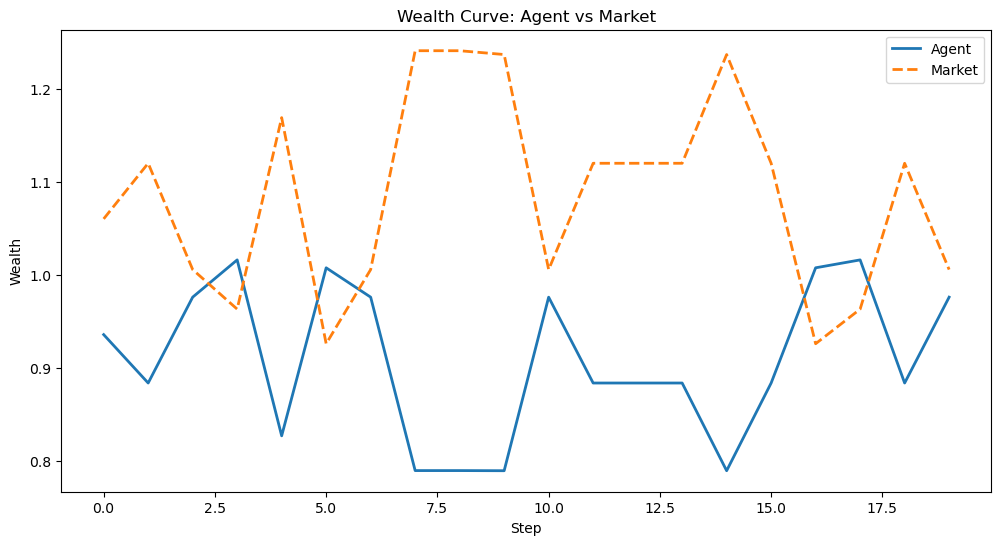


[random] mean wealth: 0.970 | market: 1.066 | reward: -0.099
[random] Sharpe: -1.544 | Max Drawdown: -0.159


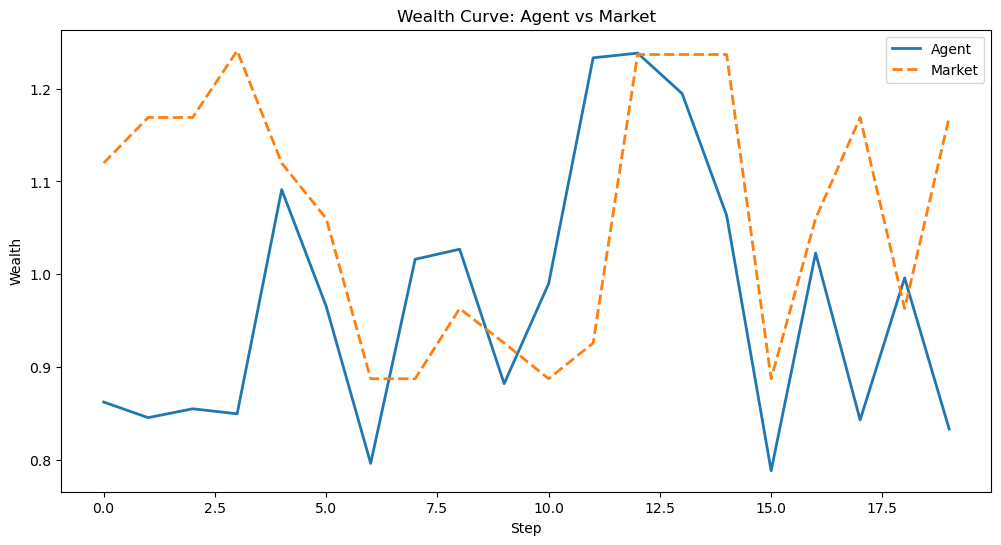

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
from stable_baselines3.common.evaluation import evaluate_policy
from torch.utils.tensorboard import SummaryWriter

# --- Utility: Sharpe & Drawdown ---
def sharpe_ratio(returns):
    return np.mean(returns) / (np.std(returns) + 1e-8) * np.sqrt(252) if len(returns) > 2 else np.nan

def max_drawdown(equity_curve):
    peak = np.maximum.accumulate(equity_curve)
    drawdowns = (equity_curve - peak) / (peak + 1e-8)
    return np.min(drawdowns)

# --- Evaluation Function ---
def evaluate_agent_pipeline(agent, env, n_episodes=25, log_dir="./logs/custom_agent_eval/", writer=None, random_agent=False, run_name="agent"):
    all_rewards, all_wealth, all_market, all_drawdown, all_sharpe = [], [], [], [], []
    reward_curves, wealth_curves, market_curves = [], [], []

    for ep in range(n_episodes):
        obs, info = env.reset()
        rewards, agent_wealth, market_wealth = [], [], []
        done = False
        while not done:
            if random_agent:
                action = env.action_space.sample()
            else:
                action, _ = agent.predict(obs, deterministic=True)
                print(action)
            obs, reward, done, truncated, info = env.step(action)
            rewards.append(reward)
            
            agent_wealth.append(info["agent_wealth"])
            market_wealth.append(info.get("market_benchmark", 1.0))
        all_rewards.append(np.sum(rewards))
        all_wealth.append(agent_wealth[-1])
        all_market.append(market_wealth[-1])
        reward_curves.append(rewards)
        wealth_curves.append(agent_wealth)
        market_curves.append(market_wealth)
        all_drawdown.append(max_drawdown(np.array(agent_wealth)))
        ep_returns = np.diff(np.array(agent_wealth))
        all_sharpe.append(sharpe_ratio(ep_returns))

        if writer:
            writer.add_scalar(f"{run_name}/EpisodeWealth", agent_wealth[-1], ep)
            writer.add_scalar(f"{run_name}/MarketWealth", market_wealth[-1], ep)
            writer.add_scalar(f"{run_name}/TotalReward", np.sum(rewards), ep)
            writer.add_scalar(f"{run_name}/Sharpe", all_sharpe[-1], ep)
            writer.add_scalar(f"{run_name}/Drawdown", all_drawdown[-1], ep)
    # ---- Collate results ----
    results = pd.DataFrame({
        "total_reward": all_rewards,
        "final_wealth": all_wealth,
        "market_wealth": all_market,
        "drawdown": all_drawdown,
        "sharpe": all_sharpe,
    })
    # --- Summary Print ---
    print(f"\n[{run_name}] mean wealth: {np.mean(all_wealth):.3f} | market: {np.mean(all_market):.3f} | reward: {np.mean(all_rewards):.3f}")
    print(f"[{run_name}] Sharpe: {np.mean(all_sharpe):.3f} | Max Drawdown: {np.mean(all_drawdown):.3f}")

    min_len = min(len(w) for w in wealth_curves)
    wealth_curves_trunc = np.array([w[:min_len] for w in wealth_curves])
    market_curves_trunc = np.array([m[:min_len] for m in market_curves])
    #print(wealth_curves)
    # --- Visualization ---
    plt.figure(figsize=(12,6))
    #plt.plot(wealth_curves[0], label="Agent", linewidth=2)
    #plt.plot(market_curves[0], label="Market", linewidth=2,linestyle='--',)
    #all_wealth
    #all_market
    plt.plot(all_wealth, label="Agent", linewidth=2)
    plt.plot(all_market, label="Market", linestyle='--', linewidth=2)
    #plt.plot(np.mean(wealth_curves_trunc, axis=0), label="Agent", linewidth=2)
    #plt.plot(np.mean(market_curves_trunc, axis=0), label="Market", linestyle='--', linewidth=2)
    plt.xlabel("Step")
    plt.ylabel("Wealth")
    plt.title(f"Wealth Curve: Agent vs Market")
    plt.legend(); plt.show()
    
    min_len = min(len(w) for w in wealth_curves)
    wealth_curves_trunc = np.array([w[:min_len] for w in wealth_curves])
    market_curves_trunc = np.array([m[:min_len] for m in market_curves])
    #print(market_curves_trunc.shape)
    """
    plt.figure()
    plt.hist(np.array(all_wealth) - np.array(all_market), bins=20, alpha=0.7)
    plt.xlabel("Excess Wealth vs Market")
    plt.title("Distribution: Agent Outperformance")
    plt.show()

    # --- Statistical tests ---
    t_stat, t_p = ttest_ind(all_wealth, all_market)
    mw_stat, mw_p = mannwhitneyu(all_wealth, all_market)
    print(f"T-test agent vs market: t={t_stat:.2f}, p={t_p:.4f}")
    print(f"Mann-Whitney agent vs market: U={mw_stat:.2f}, p={mw_p:.4f}")

    # --- Reward function analysis ---
    plt.figure(figsize=(10,4))
    plt.plot(np.mean(reward_curves, axis=0), label="Mean Reward per Step")
    plt.xlabel("Step"); plt.ylabel("Reward")
    plt.title("Reward Function Dynamics")
    plt.legend(); plt.show()
    """
    return results

# --- Example Usage ---
# Setup TensorBoard writer
writer = SummaryWriter("./logs/eval_tensorboard/")

# Agent evaluation (use your trained agent/model and test_env)
results_agent = evaluate_agent_pipeline(
    agent=model,        # your trained model
    env=test_env,       # out-of-sample env
    n_episodes=20,
    log_dir="./logs/custom_agent_eval/",
    writer=writer,
    random_agent=False,
    run_name="agent"
)

# Random agent as baseline:
results_random = evaluate_agent_pipeline(
    agent=None,
    env=test_env,
    n_episodes=20,
    log_dir="./logs/custom_agent_eval/",
    writer=writer,
    random_agent=True,
    run_name="random"
)

# --- Afterward: launch tensorboard in terminal
# tensorboard --logdir ./logs/eval_tensorboard/


In [24]:
info

{'regime': None,
 'drawdown': 0.1476738487788889,
 'agent_wealth': 0.9992687208584127,
 'market_benchmark': 1.2901713045500351,
 'realized_pnl': -0.015788073204624165,
 'trade_closed': True,
 'mode': 'train',
 'forced_exit': True}

Perfect — here's our step-by-step blueprint to design the **Custom Meta-Learning Trading Agent**:

---

## 🧠 Step 1: Core Agent Design

### ✅ Base: Fork PPO

* Start from Stable-Baselines3 `RecurrentPPO` (since we use sequences).
* Replace reward shaping and add context awareness.

---

## 🔧 Step 2: Custom Agent Enhancements

### 🧩 2.1 Regime-Aware Input Encoding

Add to observations:

* Chaos metrics: `hurst`, `entropy`, `adf_pval`
* Regime indicators: `vix_norm`, `market_return_1d`
* Predictability flags: `rf_resid_std`, `rf_r2`, `resid_autocorr`

> 🔁 These can come from a small LSTM or be concatenated directly to the input.

---

### 🧮 2.2 Risk-Aware Reward Function

Replace vanilla reward with a more sophisticated one:

$$
\text{reward}_t = \text{return}_t - \lambda \cdot \text{volatility}_t - \beta \cdot \text{drawdown}_t
$$

Optional: use **instantaneous Sharpe** or **Sortino** as reward.

---

### 🧠 2.3 Meta-Critic Module

Train a parallel model:

* Inputs: episode-level meta-features (`rf_r2`, chaos stats, etc.)
* Output: expected agent advantage (`E[R] - E[R_{random}]`)

Use this for:

* Curriculum learning
* Warm start policies
* Episode weighting

---

### 🧘 2.4 Self-Awareness (Confidence Head)

Add a head to the actor network:

* Predicts its own uncertainty or expected reward
* Can be trained with entropy, variance of Q-values, or advantage

Use this head to:

* **Skip trades** when confidence is low
* **Regulate exploration**

---

## 🎛️ Step 3: Policy Architecture

```plaintext
[Features + Regime + Chaos] ──▶ [Transformer / LSTM]
                               ├──▶ Policy Head (action logits)
                               ├──▶ Value Head (baseline)
                               └──▶ Confidence Head (optional)
```

* **Input**: `context_window x BASIC_FEATURES`
* **Optional**: Use causal Transformer instead of LSTM for richer sequence understanding
* **Heads**: action, value, confidence, and optional meta-regime head

---

## 🧪 Step 4: Training Loop Modifications

* Use **walkforward windows** with meta-features.
* Early stop episodes based on:

  * Low advantage
  * Low confidence
  * High chaos

> ➕ This avoids overfitting and saves compute.

---

## 📊 Step 5: Logging & Diagnostics

Track per episode:

* Predictability vs. final advantage
* Confidence vs. drawdown
* Regime alignment
* Meta-model score vs. real performance

---

## 🧱 Next Step?

I can now:

1. Scaffold the custom agent class (starting from `RecurrentPPO`)
2. Build a prototype architecture (with the extra heads and inputs)
3. Create the full reward function module
4. Integrate into the current pipeline




# Brainstorm checkpoint:


AI learns better when  trained to detect and act on significant regime shifts over medium-to-long windows (say, 5-20 days), instead of trying to predict every next day tick.

* The signal-to-noise ratio is much better.
* Patterns (volume spikes, volatility breakouts, cross-asset signals, regime features) are more durable.
* Less overfitting risk.
* Strategies that trade less (wait for “big” signals) tend to be more robust out-of-sample.

* Real pros (and big funds) often focus more on regime/context, not daily flipping.

Of course, with very high-frequency (millisecond) data and limit order book features, short-term prediction can work, but that’s a completely different world and requires different infrastructure.

## Strategy 
* I’d want to maximize “regime alignment”: be long in bull, flat or short in bear, and avoid noise in between.
* Detect when conditions are changing, not try to call every tiny zigzag.
* Exploit regime/context features: entropy, volatility, momentum, macro variables.



In [25]:
OHLCV_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429706 entries, 0 to 429705
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      429706 non-null  int64         
 1   symbol                  429706 non-null  object        
 2   timestamp               429706 non-null  datetime64[ns]
 3   date                    429706 non-null  datetime64[ns]
 4   open                    429706 non-null  float64       
 5   high                    429706 non-null  float64       
 6   low                     429706 non-null  float64       
 7   close                   429706 non-null  float64       
 8   volume                  429706 non-null  float64       
 9   trade_count             429706 non-null  float64       
 10  vwap                    429706 non-null  float64       
 11  weekday                 429706 non-null  float64       
 12  day_of_month            429706